<a href="https://colab.research.google.com/github/JasmineD0401/SMA-LABS/blob/main/Preprocessing_and_Exploratory_Data_Visualization(lab_3_%26_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET**[google.csv](https://drive.google.com/file/d/1P_cCP0paTAkpkAC4VB0nCKNS_-oqDlDb/view?usp=sharing)

In [ ]:
import pandas as pd
df = pd.read_csv('google.csv')

In [ ]:
df.columns

Index(['NBa7we src', 'd4r55', 'RfnDt', 'eaLgGf src', 'fzvQIb', 'xRkPPb',
       'qmhsmd', 'ARRgmb src', 'wiI7pd', 'dSlJg src', 'znYl0', 'dSlJg src 2',
       'znYl0 2'],
      dtype='object')

In [ ]:
column_indices_to_remove = [0,1,3,6,7,9,11]
df.drop(df.columns[column_indices_to_remove], axis=1, inplace=True)

In [ ]:
df

,RfnDt,fzvQIb,xRkPPb,wiI7pd,znYl0,znYl0 2
0,2 reviews,1/5,2 months ago on,Last night i went here with my family for dinn...,Like,Share
1,1 review,5/5,5 months ago on,Mayur hotel food and ambience is just awesome....,Like,Share
2,Local Guide · 25 reviews · 9 photos,3/5,4 months ago on,Rooms are clean but the interior needs to be u...,Like,Share
3,24 reviews · 2 photos,5/5,4 months ago on,Very fresh and tasty food both veg and non veg...,Like,Share
4,6 reviews,5/5,5 months ago on,Overall great staff service and location every...,Like,Share
...,...,...,...,...,...,...
1040,Local Guide · 2 reviews · 182 photos,4/5,a year ago on,NaN,Like,Share
1041,2 reviews · 4 photos,5/5,a year ago on,NaN,Like,Share
1042,4 reviews · 4 photos,5/5,a year ago on,NaN,Like,Share
1043,Local Guide · 23 reviews · 4 photos,2/5,5 years ago on,Ok ok,Like,Share


In [ ]:
# Rename columns
df.rename(columns={'RfnDt': 'info','fzvQIb':'Ratings', 'xRkPPb': 'period', 'wiI7pd': 'reviews', 'znYl0': 'like/dislike', 'znYl0 2': 'shared or not'}, inplace=True)


In [ ]:
df

,info,Ratings,period,reviews,like/dislike,shared or not
0,2 reviews,1/5,2 months ago on,Last night i went here with my family for dinn...,Like,Share
1,1 review,5/5,5 months ago on,Mayur hotel food and ambience is just awesome....,Like,Share
2,Local Guide · 25 reviews · 9 photos,3/5,4 months ago on,Rooms are clean but the interior needs to be u...,Like,Share
3,24 reviews · 2 photos,5/5,4 months ago on,Very fresh and tasty food both veg and non veg...,Like,Share
4,6 reviews,5/5,5 months ago on,Overall great staff service and location every...,Like,Share
...,...,...,...,...,...,...
1040,Local Guide · 2 reviews · 182 photos,4/5,a year ago on,NaN,Like,Share
1041,2 reviews · 4 photos,5/5,a year ago on,NaN,Like,Share
1042,4 reviews · 4 photos,5/5,a year ago on,NaN,Like,Share
1043,Local Guide · 23 reviews · 4 photos,2/5,5 years ago on,Ok ok,Like,Share


In [ ]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

info              33
Ratings           15
period            15
reviews           57
like/dislike     137
shared or not     28
dtype: int64


In [ ]:
# Filling missing values in the 'info' column
df['info'].fillna('No Information', inplace=True)

# Filling missing values in the 'period' column with the mode value
mode_period = df['period'].mode()[0]
df['period'].fillna(mode_period, inplace=True)

# Filling missing values in the 'reviews' column with 'No Reviews'
df['reviews'].fillna('No Reviews', inplace=True)

# Filling missing values in the 'like/dislike' column with 'Neutral'
df['like/dislike'].fillna('dislike', inplace=True)

# Filling missing values in the 'shared or not' column with 'Not shared'
df['shared or not'].fillna('Not shared', inplace=True)
# Filling missing values in the 'Ratings' column with the mean value


# Convert ratings to numeric by extracting the numerator
df['Ratings'] = df['Ratings'].str.extract(r'(\d+)/5').astype(float)

# Calculate the mean rating
mean_rating = df['Ratings'].mean()

# Fill missing values in the 'Ratings' column with the mean rating
df['Ratings'].fillna(mean_rating, inplace=True)

In [ ]:
df

,info,Ratings,period,reviews,like/dislike,shared or not
0,2 reviews,1.0,2 months ago on,Last night i went here with my family for dinn...,Like,Share
1,1 review,5.0,5 months ago on,Mayur hotel food and ambience is just awesome....,Like,Share
2,Local Guide · 25 reviews · 9 photos,3.0,4 months ago on,Rooms are clean but the interior needs to be u...,Like,Share
3,24 reviews · 2 photos,5.0,4 months ago on,Very fresh and tasty food both veg and non veg...,Like,Share
4,6 reviews,5.0,5 months ago on,Overall great staff service and location every...,Like,Share
...,...,...,...,...,...,...
1040,Local Guide · 2 reviews · 182 photos,4.0,a year ago on,No Reviews,Like,Share
1041,2 reviews · 4 photos,5.0,a year ago on,No Reviews,Like,Share
1042,4 reviews · 4 photos,5.0,a year ago on,No Reviews,Like,Share
1043,Local Guide · 23 reviews · 4 photos,2.0,5 years ago on,Ok ok,Like,Share


In [ ]:

# Checking for duplicates and removing them
# Check Duplicates
num_duplicates = df.duplicated().sum()
print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 16


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

num_duplicates = df.duplicated().sum()
print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 0


In [ ]:
# Importing necessary libraries for text pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
stop_words.discard('no')
stop_words.discard('not')
lemmatizer = WordNetLemmatizer()

# Pre-processing text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join(e for e in text if e.isalnum() or e.isspace())
        text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)
        text = ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(text))
        return text
    elif isinstance(text, (int, float)):
        # Skip preprocessing for numeric values
        return text
    else:
        return ""

# Fill NaN values and apply text pre-processing
df = df.fillna('')
df = df.applymap(lambda x: preprocess_text(x))

# Count the number of missing values after text pre-processing
missing_values = df.isnull().sum()
print(missing_values)

info             0
Ratings          0
period           0
reviews          0
like/dislike     0
shared or not    0
dtype: int64


In [ ]:
df

,info,Ratings,period,reviews,like/dislike,shared or not
0,2 review,1.0,2 month ago,last night went family dinner firstly unorgani...,like,share
1,1 review,5.0,5 month ago,mayur hotel food ambience awesome party 50 per...,like,share
2,local guide 25 review 9 photo,3.0,4 month ago,room clean interior need upgraded service food...,like,share
3,24 review 2 photo,5.0,4 month ago,fresh tasty food veg non veg service quick man...,like,share
4,6 review,5.0,5 month ago,overall great staff service location everythin...,like,share
...,...,...,...,...,...,...
1040,local guide 2 review 182 photo,4.0,year ago,no review,like,share
1041,2 review 4 photo,5.0,year ago,no review,like,share
1042,4 review 4 photo,5.0,year ago,no review,like,share
1043,local guide 23 review 4 photo,2.0,5 year ago,ok ok,like,share


In [ ]:
from datetime import date, timedelta
import re
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [ ]:
# List of additional words to exclude
custom_stopwords = ["even","waiter","bhaji","fried","order","mani's","management","dosa",
                    "dine","friend","choice","mani","family","must","review", "food", "ordered",
                    "taste", "ulhasnagar", "hotel", "restaurant", "service", "place", "quality", "staff",
                    "customer", "price", "ambience", "dinner", "healthy", "visit","menu","third"]

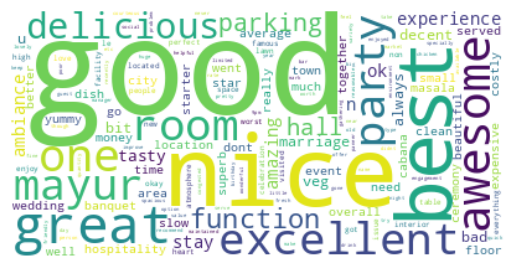

In [ ]:
# Join all reviews into a single string
text2 = " ".join(review for review in df.reviews)


# Create a WordCloud object, specifying custom stopwords along with common English stopwords
word_cloud2 = WordCloud(stopwords=set(STOPWORDS.union(custom_stopwords)),
                        collocations=False, background_color='white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

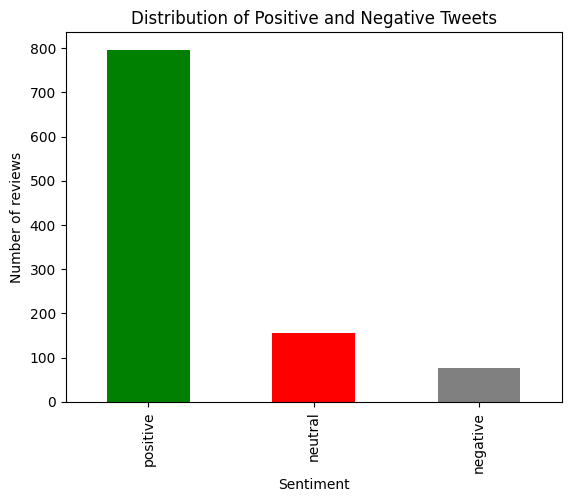

In [ ]:
# Apply sentiment analysis to each tweet
df['sentiment'] = df['reviews'].apply(get_sentiment_polarity)

# Categorize sentiments as positive, negative, or neutral
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive'
                                                 if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count the number of positive and negative tweets
sentiment_counts = df['sentiment_category'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Positive and Negative Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

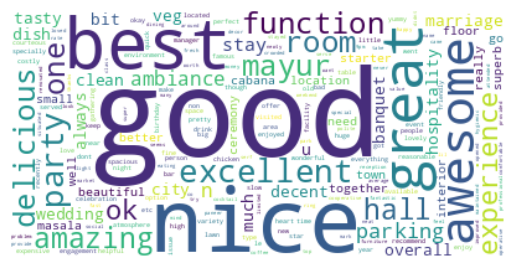

In [ ]:
# Apply sentiment analysis to each review
df['sentiment'] = df['reviews'].apply(get_sentiment_polarity)

# Filter only positive reviews
positive_reviews_df = df[df['sentiment'] > 0]


# Join all positive reviews into a single string
positive_reviews_text = " ".join(review for review in positive_reviews_df['reviews'])


# Create a WordCloud object, specifying custom stopwords along with common English stopwords
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS.union(custom_stopwords)),
                               collocations=False,
                               background_color='white').generate(positive_reviews_text)

# Display the generated Word Cloud for positive reviews
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

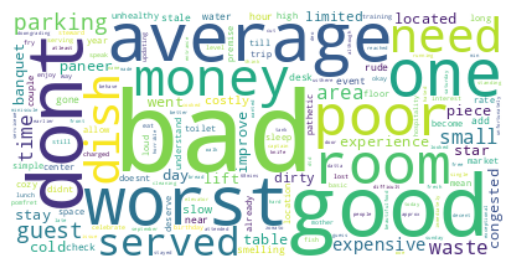

In [ ]:
# Apply sentiment analysis to each review
df['sentiment'] = df['reviews'].apply(get_sentiment_polarity)

# Filter only positive reviews
negative_reviews_df = df[df['sentiment'] < 0]


# Join all positive reviews into a single string
negative_reviews_text = " ".join(review for review in negative_reviews_df['reviews'])


# Create a WordCloud object, specifying custom stopwords along with common English stopwords
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS.union(custom_stopwords)),
                               collocations=False,
                               background_color='white').generate(negative_reviews_text)

# Display the generated Word Cloud for positive reviews
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

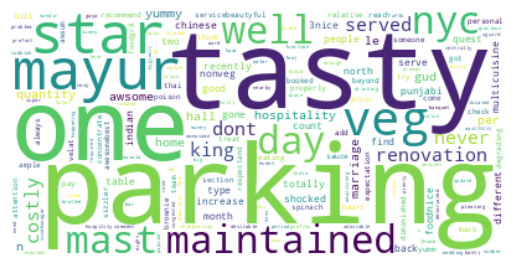

In [ ]:
# Apply sentiment analysis to each review
df['sentiment'] = df['reviews'].apply(get_sentiment_polarity)

# Filter only positive reviews
neutral_reviews_df = df[df['sentiment'] == 0]


# Join all positive reviews into a single string
neutral_reviews_text = " ".join(review for review in neutral_reviews_df['reviews'])


# Create a WordCloud object, specifying custom stopwords along with common English stopwords
wordcloud_neutral = WordCloud(stopwords=set(STOPWORDS.union(custom_stopwords)),
                               collocations=False,
                              background_color='white').generate(neutral_reviews_text)

# Display the generated Word Cloud for positive reviews
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

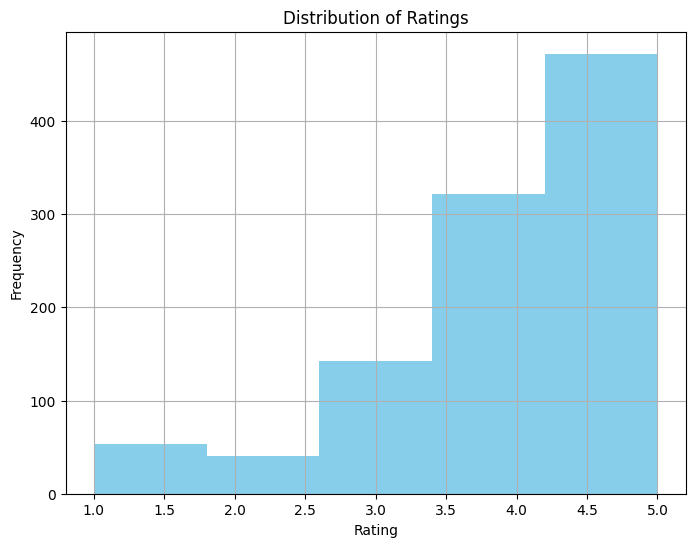

In [ ]:
ratings = df['Ratings']

# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=5, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

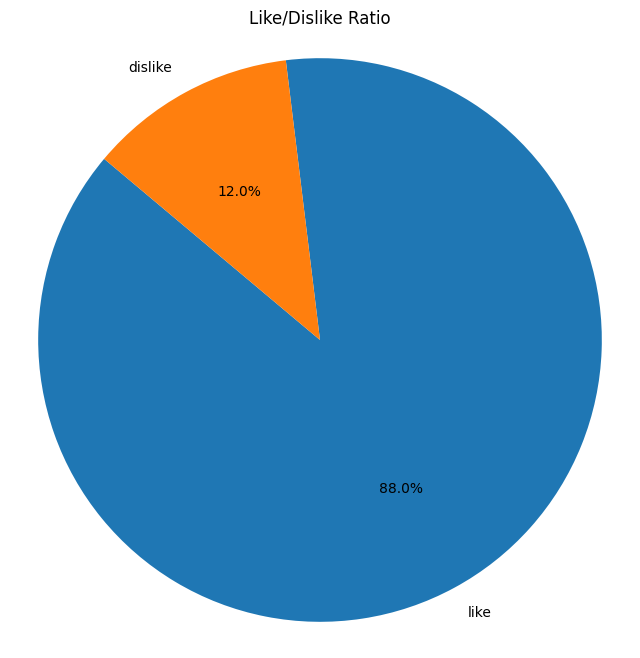

In [ ]:
# Count the number of likes and dislikes
like_dislike_counts = df['like/dislike'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(like_dislike_counts, labels=like_dislike_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Like/Dislike Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

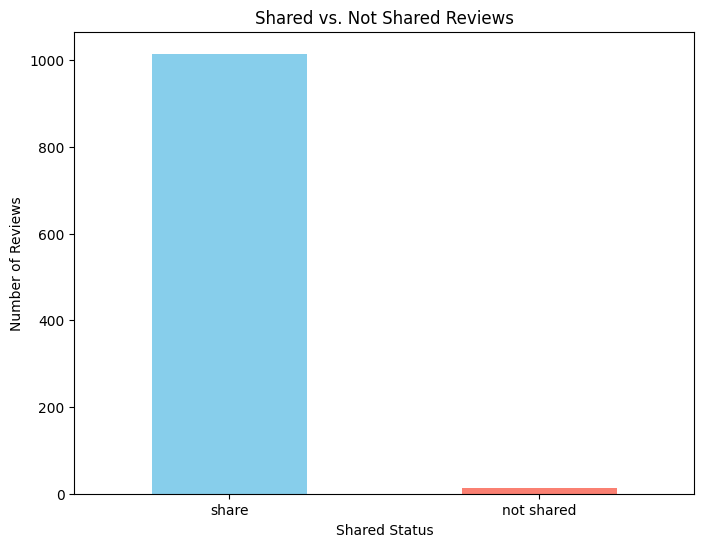

In [ ]:
# Count the number of shared and not shared reviews
shared_counts = df['shared or not'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
shared_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Shared vs. Not Shared Reviews')
plt.xlabel('Shared Status')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

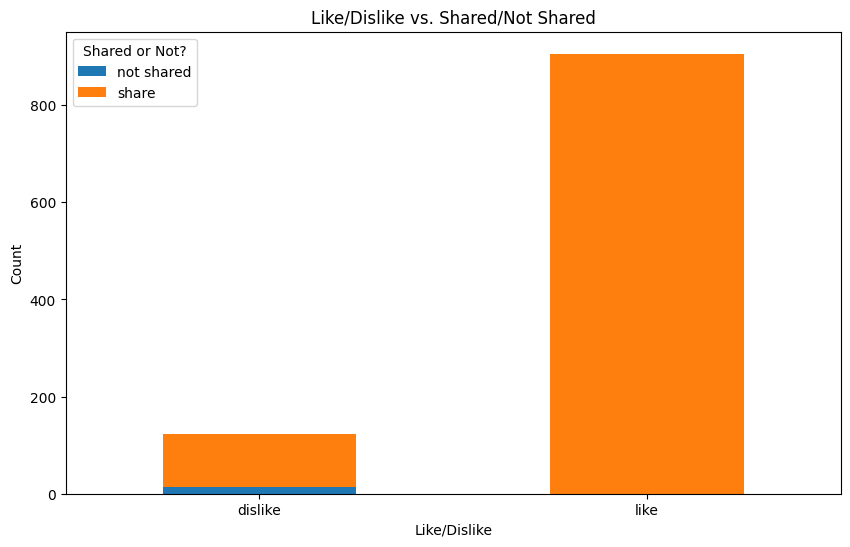

In [ ]:
# Create a crosstab to count combinations of 'like/dislike'
# and 'shared or not?' values

cross_tab = pd.crosstab(df['like/dislike'], df['shared or not'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Like/Dislike vs. Shared/Not Shared')
plt.xlabel('Like/Dislike')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Shared or Not?')
plt.show()

In [ ]:
df.columns

Index(['info', 'Ratings', 'period', 'reviews', 'like/dislike', 'shared or not',
       'sentiment', 'sentiment_category'],
      dtype='object')

In [ ]:
df['period'].unique()

array(['2 month ago', '5 month ago', '4 month ago', '7 month ago',
       '5 year ago', '3 month ago', '8 month ago', '9 month ago',
       'year ago', '6 month ago', '6 day ago', '2 year ago',
       '10 month ago', '4 year ago', '3 year ago', '6 year ago',
       '11 month ago', '7 year ago', 'month ago', '3 week ago',
       '8 year ago', '10 year ago', '9 year ago', '2 day ago'],
      dtype=object)

In [ ]:
from datetime import datetime, timedelta
import re

# Function to parse time strings
def parse_time(time_str):
    try:
        if 'month ago' in time_str:
            match = re.search(r'(\d+) month ago', time_str)
            if match:
                num = int(match.group(1))
                delta = timedelta(days=num * 30)
                after_format = datetime.now() - delta
                return after_format.date()
            else:
                return None
        elif 'year ago' in time_str:
            match = re.search(r'(\d+) year ago', time_str)
            if match:
                num = int(match.group(1))
                delta = timedelta(days=num * 365)
                after_format = datetime.now() - delta
                return after_format.date()
            else:
                return None
        else:
            return None
    except Exception as e:
        print(f"Error parsing time string '{time_str}': {e}")
        return None

# Apply the function to parse the 'period' column and update it directly
df['period'] = df['period'].apply(parse_time)

# Print the DataFrame with the updated 'period' column containing parsed date values
print(df['period'])


0       2024-02-07
1       2023-11-09
2       2023-12-09
3       2023-12-09
4       2023-11-09
           ...    
1040          None
1041          None
1042          None
1043    2019-04-09
1044    2018-04-09
Name: period, Length: 1029, dtype: object


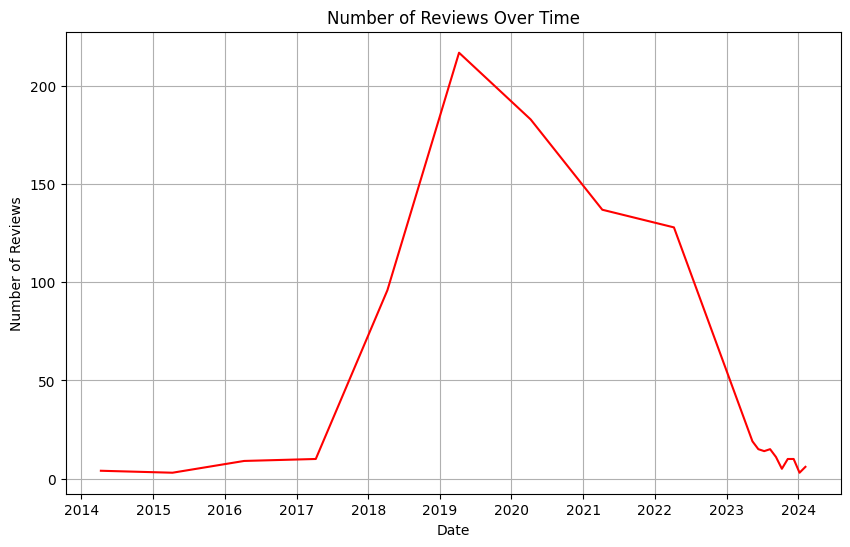

In [ ]:
# Group by period and count the number of occurrences for each date
date_counts = df['period'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
date_counts.plot(kind='line', color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

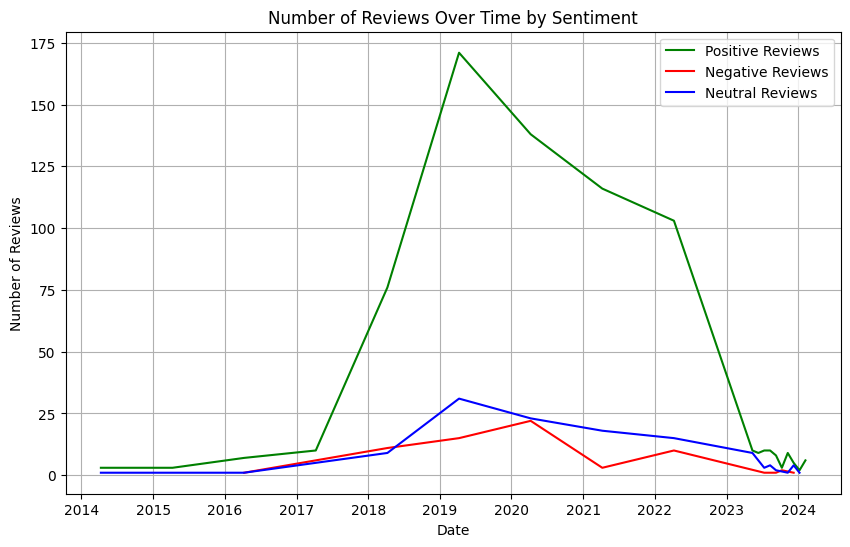

In [ ]:
# Filter DataFrame for positive reviews
positive_reviews = df[df['sentiment_category'] == 'positive']

# Group positive reviews by 'period' and count the number of reviews for each time period
positive_counts = positive_reviews['period'].value_counts().sort_index()

# Filter DataFrame for negative reviews
negative_reviews = df[df['sentiment_category'] == 'negative']

# Group negative reviews by 'period' and count the number of reviews for each time period
negative_counts = negative_reviews['period'].value_counts().sort_index()

# Filter DataFrame for neutral reviews
neutral_reviews = df[df['sentiment_category'] == 'neutral']

# Group neutral reviews by 'period' and count the number of reviews for each time period
neutral_counts = neutral_reviews['period'].value_counts().sort_index()

# Plotting the line chart for positive reviews
plt.figure(figsize=(10, 6))
positive_counts.plot(kind='line', color='green', label='Positive Reviews')

# Plotting the line chart for negative reviews
negative_counts.plot(kind='line', color='red', label='Negative Reviews')

# Plotting the line chart for neutral reviews
neutral_counts.plot(kind='line', color='blue', label='Neutral Reviews')

plt.title('Number of Reviews Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()

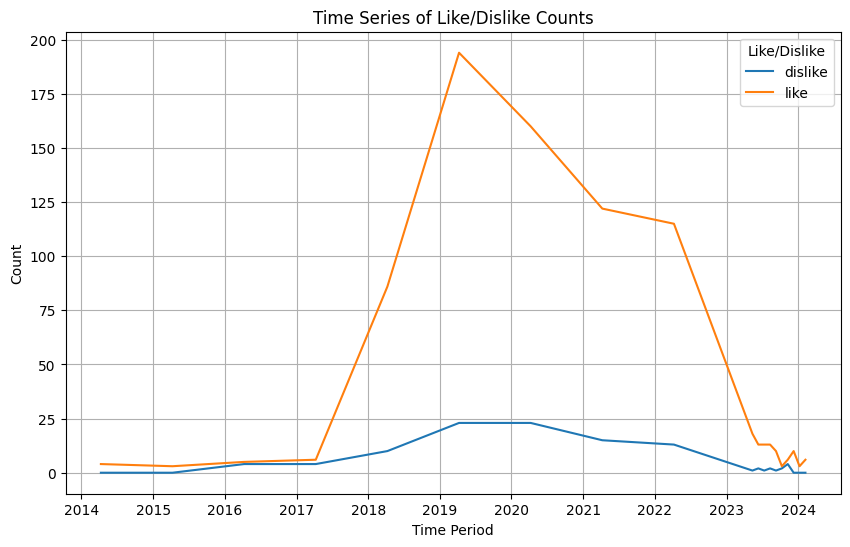

In [ ]:
like_dislike_time_series = df.pivot_table(index='period', columns='like/dislike',
                                          aggfunc='size', fill_value=0)
like_dislike_time_series.plot(kind='line', figsize=(10, 6))
plt.title('Time Series of Like/Dislike Counts')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Like/Dislike')
plt.show()

In [ ]:
# Assuming df is your cleaned DataFrame
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>